# PC5228 Analysis

In this file I will do the analysis of the extended results of Mach-Zehnder interferometer-like Quantum circuit from `PC5228_data_generation_extended.ipynb`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import qiskit
from scipy.optimize import curve_fit

First, let us plot the counts.

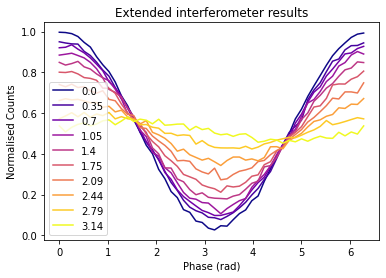

In [2]:
phase_steps = 50
rot_steps = 10
phases = np.linspace(0, 2*np.pi, num=phase_steps)
rots = np.linspace(0, np.pi, num=rot_steps)

cmap = matplotlib.cm.get_cmap('plasma')
data = np.ndarray((rot_steps, phase_steps, 2))

for i in range(rot_steps):
    data[i,:,:] = np.loadtxt('data_extended//data_{}.txt'.format(i))
    rot = rots[i]
    rgba = cmap(rot/np.pi)
    plt.plot(phases, data[i,:,0]/2048, color=rgba, label=round(rot,2))
    
plt.title('Extended interferometer results')
plt.xlabel('Phase (rad)')
plt.ylabel('Normalised Counts')
plt.legend(loc='best')
plt.show()

Here we can see that the interference grows weaker as the RX rotation becomes larger. Now let us turn our attention to the interferometric visibility again.

$$
\nu = \frac{I_{max} - I_{min}}{I_{max} + I_{min}}
$$

For a Mach-Zehnder interferometer, this value should ideally be 1 as $I_{min} = 0$ and $I_{max} = 1$. For our extended interferometer though, the expression will also depend on the RX rotation.

$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$

$$
\nu(\phi) = \left| \braket{\psi}{RX(\phi)|\psi}\right| = \cos\left(\frac{\phi}{2}\right)
$$

For this part, we use curve fitting to find the visibility, similar to the previous file.

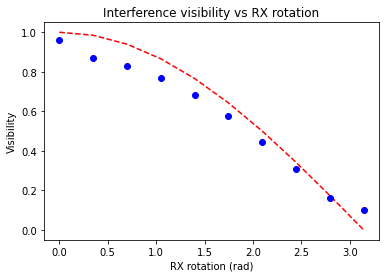

In [4]:
def visibility(counts):
    def fit(x, v, d):
        return 1/2 * (1 + v * np.cos(x + d))

    # Fit the data
    pars, cov = curve_fit(f=fit, xdata=phases, ydata=counts/2048, p0=[100, 0], bounds=(-np.inf, np.inf))

    # Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
    stdevs = np.sqrt(np.diag(cov))
    return (pars[0], stdevs[0])

vis = np.ndarray((rot_steps))
std_vis = np.ndarray((rot_steps))
for i in range(rot_steps):
    rot = rots[i]
    vis[i], std_vis[i] = visibility(data[i,:,0])

plt.errorbar(rots, vis, yerr=std_vis, fmt='bo')
plt.plot(rots, np.cos(rots/2), 'r--')
plt.xlabel('RX rotation (rad)')
plt.ylabel('Visibility')
plt.title('Interference visibility vs RX rotation')
plt.show()